# Trabajar con datos tabulados: DataFrame de pandas

<a id='indice'></a>
# Índice
1. ### [Introducción](#intro)
1. ### [Cómo crear un Dataframe de pandas](#crear_df)
1. ### [Mostrar primeras filas, últimas filas o filas aleatorias](#ver_parte)
1. ### [Ordenar](#ordenar)
1. ### [Seleccionar datos](#sel_datos)
    - ### [Seleccionar filas y columnas mediante índices (iloc)](#sel_iloc)
    - ### [Seleccionar filas y columnas mediante etiquetas (loc)](#sel_loc)
    - ### [Seleccionar en función de una condición](#sel_con)
1. ### [Crear nuevas columnas](#nuevas_columnas)
1. ### [Funciones resumen: describe, sum, mean, median, count, corr, cov, unique, value_counts, min, max...](#resumen)
1. ### [Funciones de mapeo de datos: map y apply](#map_apply)
1. ### [Agrupar datos](#agrupar)
1. ### [Datos faltantes](#datos_faltantes)
1. ### [Guardar el dataframe en un fichero](#guardar)
1. ### [Visualización con matplotlib](#visualizacion)
1. ### [Ajuste por mínimos cuadrados](#ajuste)



**Nota.** Este tutorial cubre aspectos básicos sobre el uso de dataframes en Python. En el siguiente enlace puedes encontrar la [API completa de la clase DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)

<a id='crear_df'></a>

<a id='intro'></a>
## Introducción

Un dataframe es una estructura de datos que permite trabajar con datos tabulados (datos en forma de tabla, organizados en filas y columnas). Python da soporte a multitud de operaciones con datos tabulados a través de la biblioteca **pandas**. Lo primero que deberemos hacer, por tanto, es importar esta biblioteca.

In [2]:
import pandas as pd

<a id='crear_df'></a>
## Crear un Dataframe de pandas

Es posible crear un dataframe a partir de una matriz numpy, a partir de un diccionario, a partir de un fichero (normalmente en formato CSV), etc.

### Crear de un dataframe a partir de un array numpy

In [1]:
import pandas as pd
import numpy as np

data = np.array([['','Col1','Col2'], ['Fila1',1,2], ['Fila2',3,4]])
df = pd.DataFrame(data=data[1:,1:], index=data[1:,0], columns=data[0,1:])
df
# Nota. El comando df muestra el contenido del dataframe únicamente si estamos en un entorno 
# interactivo (p. ej. en jupyter-notebook). Para entornos no interactivos (p. ej. cuando 
# tenemos el código en un fichero py) deberíamos escribir la instrucción print(df)

,Col1,Col2
Fila1,1,2
Fila2,3,4


### Crear un dataframe a partir de un fichero csv
Lo más habitual será crear el dataframe a partir de los datos contenidos en un fichero CSV ([Comma Separated Values](https://en.wikipedia.org/wiki/Comma-separated_values)). Los programas que trabajan con datos tabulados (Excel, Libreoffice, ...) permiten exportar los datos a formato CSV.

En este tutorial vamos a trabajar con el fichero de ejemplo `notas.csv`. Este fichero (con datos ficticios) contiene el nombre, grupo y notas (parcial1, parcial2, nota de clase, nota de prácticas) de un conjunto de estudiantes.


A continuación se muestra un ejemplo de cómo cargar un fichero CSV. Para más información, [aquí tienes la API completa de la función read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [1]:
import pandas as pd
df = pd.read_csv('notas.csv', delimiter=';') # El delimitador es el carácter separador de columnas (por defecto, la coma)

[Volver al índice](#indice)

<a id='ver_parte'></a>
## Mostrar primeras filas, últimas filas o filas aleatorias

Cuando tenemos una gran cantidad de datos, muchas veces no querremos mostrarlos todos, sino únicamente una pequeña selección a modo de ejemplo para ver el aspecto de los mismos.

Podemos ver las 5 primeras líneas con:

In [5]:
df.head()

,Nombre,Grupo,Par1,Par2,Clase,Practicas
0,Alf,A,6.13,8.25,8.83,6.50
1,Alien,B,3.40,5.50,6.17,4.50
2,Asterix,B,6.95,3.00,7.20,8.25
3,Bart Simpson,C,4.95,1.10,0.00,0.00
4,Batman,C,7.25,8.75,9.92,10.00


O las 5 últimas con:

In [8]:
df.tail()

,Nombre,Grupo,Par1,Par2,Clase,Practicas
53,Vegeta,C,8.75,6.00,6.17,7.00
54,Vito Corleone,B,5.40,3.20,4.57,2.00
55,Winnie The Pooh,B,5.50,5.85,8.53,7.75
56,Woody,C,3.05,2.05,0.00,2.00
57,Yoda,A,2.25,0.10,9.44,4.50


**Nota:** tanto `head` como `tail` permiten recibir el número de filas como argumento (argumento que es opcional con valor por defecto igual a 5)

In [7]:
df.tail(3) # ahora mostramos solamente las 3 últimas:

,Nombre,Grupo,Par1,Par2,Clase,Practicas
55,Winnie The Pooh,B,5.50,5.85,8.53,7.75
56,Woody,C,3.05,2.05,0.00,2.00
57,Yoda,A,2.25,0.10,9.44,4.50


O unas cuantas líneas aleatorias con:

In [14]:
df.sample(5)

,Nombre,Grupo,Par1,Par2,Clase,Practicas
46,Shrek,A,2.37,4.55,8.90,0.0
26,Jerry Mouse,C,2.00,4.75,9.67,10.0
17,Gandalf,B,9.25,9.75,9.63,10.0
20,Harry Potter,B,5.20,4.50,4.47,0.0
24,Indiana Jones,A,7.70,2.15,10.00,8.0


[Volver al índice](#indice)

<a id='ordenar'></a>
## Ordenar
Pandas dispone de la función **sort_values()** para ordenar un dataframe.

[Aquí tienes más información sobre esta operación](#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [4]:
# Ordena por la columna 'Par1' (Parcial 1) en orden descendente (devuelve otro DataFrame ordenado)
df_ordenado = df.sort_values(by='Par1', ascending=False)
df_ordenado.head()

,Nombre,Grupo,Par1,Par2,Clase,Practicas
48,Son Goku,C,9.50,9.50,10.00,10.00
40,Popeye,A,9.45,9.45,10.00,10.00
39,Pinocho,C,9.38,9.00,9.42,8.25
17,Gandalf,B,9.25,9.75,9.63,10.00
51,Thor,A,9.25,9.75,10.00,9.00


In [5]:
# Lo mismo, pero en lugar de devolver otro DataFrame ordenado, ordena el propio DataFrame (inplace=True)
df.sort_values(by='Par1', ascending=False, inplace=True)
df.head()

,Nombre,Grupo,Par1,Par2,Clase,Practicas
48,Son Goku,C,9.50,9.50,10.00,10.00
40,Popeye,A,9.45,9.45,10.00,10.00
39,Pinocho,C,9.38,9.00,9.42,8.25
17,Gandalf,B,9.25,9.75,9.63,10.00
51,Thor,A,9.25,9.75,10.00,9.00


[Volver al índice](#indice)

<a id='sel_datos'></a>
## Seleccionar datos

Las funciones que usaremos para selección de datos son ***loc*** e ***iloc***. La función ***loc*** permite seleccionar filas (o columnas) a partir de etiquetas, mientras que ***iloc*** permite seleccionar a partir de índices (posiciones).

<a id='sel_iloc'></a>
## Seleccionar filas y columnas mediante índices (iloc)
La sintaxis general es **mi_dataframe.iloc[rango_filas,rango_columnas]** donde **rango** seguirá la misma sintaxis que la usada para el *slicing* de listas. Si solo se especifica uno de los rangos, se entiende que es el de filas.

In [9]:
# Muestra los datos de la fila 0
df.iloc[0]

Nombre        Alf
Grupo           A
Par1         6.13
Par2         8.25
Clase        8.83
Practicas     6.5
Name: 0, dtype: object

In [10]:
# Muestra de la fila 5 a la 9
df.iloc[5:10]

,Nombre,Grupo,Par1,Par2,Clase,Practicas
5,Bob Esponja,C,2.20,0.75,0.00,2.5
6,Bugs Bunny,A,1.75,NaN,1.67,NaN
7,Buzz Lightyear,A,4.70,4.95,8.33,10.0
8,Capitan Sparrow,A,2.25,0.25,6.11,4.0
9,Captain America,A,2.95,2.45,7.22,7.5


In [11]:
# Muestra las 4 últimas filas en orden inverso
df.iloc[-1:-5:-1]

,Nombre,Grupo,Par1,Par2,Clase,Practicas
57,Yoda,A,2.25,0.10,9.44,4.50
56,Woody,C,3.05,2.05,0.00,2.00
55,Winnie The Pooh,B,5.50,5.85,8.53,7.75
54,Vito Corleone,B,5.40,3.20,4.57,2.00


### Seleccionar un elemento de una fila y columna determinada con iloc

In [12]:
# Muestra el elemento de la primera fila, primera columna
print(df.iloc[0][0])   # Equivalente a print(df.iloc[0,0])
# Muestra el elemento de la primera fila, última columna (Practicas)
print(df.loc[0][-1])

Alf
6.5


### Seleccionar un rango de filas y columnas con iloc

In [13]:
# Selecciona filas de la 5 a la 9 (ambas incluidas) y columnas de la 2 a la 3 (ambas incluidas)
df.iloc[5:10,2:4]

,Par1,Par2
5,2.20,0.75
6,1.75,NaN
7,4.70,4.95
8,2.25,0.25
9,2.95,2.45


### Seleccionar filas y/o columnas no contiguas
Si los elemento a seleccionar no están contiguos, en lugar de un rango usaremos una lista.

In [15]:
# Selecciona filas de la 5 a la 9 (ambas incluidas) y las columnas 0 (Nombre) y 5 (Practicas)
df.iloc[5:10,[0,5]]

,Nombre,Practicas
5,Bob Esponja,2.5
6,Bugs Bunny,NaN
7,Buzz Lightyear,10.0
8,Capitan Sparrow,4.0
9,Captain America,7.5


### Seleccionar un rango de columnas (para todas las filas) con iloc

In [ ]:
# Selecciona los datos de la última columna
df.iloc[:,-1]

[Volver al índice](#indice)

<a id='sel_loc'></a>
## Seleccionar filas y columnas mediante etiquetas (loc)

A diferencia de **iloc**, que únicamente trabaja con índices, **loc** permite hacer selecciones basadas en etiquetas (de fila o columna)

In [ ]:
# Selecciona la columna 'Practicas' de las todas filas
df.loc[:,'Practicas']


In [18]:
# Selecciona las columnas 'Par1' y 'Par2' de la fila 0 a la 5 (¡¡ambas incluidas!!)
# Observa que para definir más de una etiqueta de columna, utilizamos una lista.
df.loc[0:5,['Par1', 'Par2']]

,Par1,Par2
0,6.13,8.25
1,3.40,5.50
2,6.95,3.00
3,4.95,1.10
4,7.25,8.75
5,2.20,0.75


In [19]:
# Selecciona las columnas desde 'Par1' hasta 'Practicas' (ambas incluidas) de la fila 0 a la 5 (¡¡ambas incluidas!!)
df.loc[0:5,'Par1':'Practicas']

,Par1,Par2,Clase,Practicas
0,6.13,8.25,8.83,6.50
1,3.40,5.50,6.17,4.50
2,6.95,3.00,7.20,8.25
3,4.95,1.10,0.00,0.00
4,7.25,8.75,9.92,10.00
5,2.20,0.75,0.00,2.50


[Volver al índice](#indice)

<a id='sel_con'></a>
## Seleccionar en función de una condición

Habitualmente querremos sleccionar las filas/columnas que cumplan cierta condición.
Para ello debemos pasar a **loc** un array o objeto de tipo **Series** con valores True/False, con lo que se seleccionarán todas las filas que tengan valor True.

In [ ]:
# Genera una serie (objeto e tipo Series) donde cada elemento es True si 'Par1' >= 5 o False en caso contrario
df['Par1'] >= 5

In [ ]:
# Selecciona todas las filas que cumplan la condición df['Par1'] >= 5
seleccion = df['Par1'] >= 5
df.loc[seleccion]

In [ ]:
# Habitualmente se compactan las dos instrucciones anteriores en una única
df.loc[df['Par1'] >= 5]

In [23]:
# Selecciona las columnas 'Par1' y 'Par2' para todas la filas con 'Nombre' = 'Batman'
df.loc[df['Nombre'] == 'Batman', ['Par1','Par2']]

,Par1,Par2
4,7.25,8.75


In [24]:
# Selecciona las columna desde 'Par1' hasta 'Practicas' (ambas incluidas) para todas la filas 
# que cumplan la condición 'Par1' >= 5 and 'Par2' >= 5 and 'Grupo' = 'A'
df.loc[(df['Par1'] >= 5) & (df['Par2'] >= 5) & (df['Grupo'] == 'A'), 'Par1':'Practicas']

,Par1,Par2,Clase,Practicas
0,6.13,8.25,8.83,6.5
12,7.15,7.10,10.00,10.0
23,6.75,5.40,9.44,9.0
37,6.55,5.55,10.00,9.0
40,9.45,9.45,10.00,10.0
51,9.25,9.75,10.00,9.0


In [ ]:
# Selecciona las filas con 'Grupo' = 'A' or 'Grupo' = 'B'
df.loc[(df['Grupo'] == 'A') | (df['Grupo'] == 'B')]

**Nota:** Observa que en los dos ejemplos anteriores se deben utilizar los operadores (denominados **element-wise**) `&` y `|` en lugar de `and` y `or`.

[Volver al índice](#indice)

<a id='nuevas_columnas'></a>
## Crear nuevas columnas
En muchas ocasiones es interesante añadir nuevas columnas, bien a partir de datos almacenados en algún otro lugar, bien a partir de los propios datos almacenados en el dataframe.

In [ ]:
# Crea la columna 'Nota_Final' con el valor (Par1+Par2+Clase+'Practicas)/4
df['Nota_Final'] = (df['Par1'] + df['Par2'] + df['Clase'] + df['Practicas']) / 4
df

[Volver al índice](#indice)

<a id='resumen'></a>
## Funciones resumen: describe, sum, mean, median, count, corr, cov, unique, value_counts, min, max...

Estas funciones ofrecen algunos valores que, de algún modo, resumen la información almacenada en el dataframe.


**`describe`**

In [26]:
# Muestra un resumen estadístico de los datos
df.describe()

,Par1,Par2,Clase,Practicas,Nota_Final
count,58.000000,57.000000,58.000000,56.000000,56.000000
mean,5.195517,4.039474,6.416897,5.560714,5.351875
std,2.658617,3.047038,3.201833,3.760074,2.753890
min,0.750000,0.000000,0.000000,0.000000,0.742500
25%,2.837500,1.850000,4.495000,2.375000,3.150000
50%,5.350000,3.750000,7.065000,6.875000,5.715000
75%,7.100000,5.750000,9.440000,9.000000,7.309375
max,9.500000,9.750000,10.000000,10.000000,9.750000


In [27]:
# Lo mismo que lo anterior, pero únicamente para la columna prácticas
df['Practicas'].describe()

count    56.000000
mean      5.560714
std       3.760074
min       0.000000
25%       2.375000
50%       6.875000
75%       9.000000
max      10.000000
Name: Practicas, dtype: float64

In [28]:
# Lo mismo que lo anterior, pero únicamente para los alumnos del grupo A
df.loc[df['Grupo'] == 'A'].describe()

,Par1,Par2,Clase,Practicas,Nota_Final
count,18.000000,17.000000,18.000000,17.000000,17.000000
mean,5.388889,4.223529,8.005556,6.700000,6.226176
std,2.583165,3.115140,2.704417,3.266305,2.386265
min,1.750000,0.100000,1.670000,0.000000,1.447500
25%,2.962500,1.850000,7.220000,4.500000,4.072500
50%,6.065000,4.150000,9.170000,8.000000,6.962500
75%,7.050000,5.550000,10.000000,9.000000,7.725000
max,9.450000,9.750000,10.000000,10.000000,9.725000


**`sum`, `mean`, `median`, `count`**

In [9]:
# Nota media parcial 1
print('Nota media parcial 1: ', df['Par1'].mean())  # También válido df.Par1.mean()
# Otra forma de calcular la media
print('Nota media parcial 1: ', df['Par1'].sum()/df['Par1'].count())

# Mediana
print('Mediana parcial 1: ', df['Par1'].median())

Nota media parcial 1:  5.195517241379311
Nota media parcial 1:  5.19551724137931
Mediana parcial 1:  5.35


**Correlación y covarianza: `corr`, `cov`**

In [29]:
# Correlación entre todas las columnas numéricas
df.corr()

,Par1,Par2,Clase,Practicas,Nota_Final
Par1,1.000000,0.777271,0.583590,0.603694,0.829045
Par2,0.777271,1.000000,0.702407,0.677170,0.901620
Clase,0.583590,0.702407,1.000000,0.694667,0.861652
Practicas,0.603694,0.677170,0.694667,1.000000,0.876813
Nota_Final,0.829045,0.901620,0.861652,0.876813,1.000000


In [30]:
# Covarianza entre todas las columnas numéricas
df.cov()

,Par1,Par2,Clase,Practicas,Nota_Final
Par1,7.068243,6.256609,4.967777,6.038381,6.073402
Par2,6.256609,9.284441,6.776680,7.796672,7.603005
Clase,4.967777,6.776680,10.251734,8.343782,7.579987
Practicas,6.038381,7.796672,8.343782,14.138156,9.079248
Nota_Final,6.073402,7.603005,7.579987,9.079248,7.583911


In [31]:
# Correlación entre las notas del Parcial1 y Parcial2 para los alumnos del grupo A
df.loc[df['Grupo'] == 'A', ['Par1','Par2']].corr()

,Par1,Par2
Par1,1.000000,0.721337
Par2,0.721337,1.000000


**`unique` y `value_counts`**

**`unique`** muestra los distintos valores que aparecen en una columna dada

In [ ]:
# Muestra las posibles etiquetas de la columna 'Grupo'
print(df['Grupo'].unique())  # También válido df.Grupo.unique()


**`value_counts`** cuenta, para una columna dada, la cantidad de registros (filas) para cada uno de los distintos valores que puede tener la columna.

In [14]:
# Muestra el número de alumnos que hay en cada grupo
print(df['Grupo'].value_counts())

# Esto es equivalente a agrupar el dataframe por la columna 'Grupo', seleccionar 
# dicha columna y contar el número de filas de cada subgrupo
df.groupby('Grupo').count()

B    22
C    18
A    18
Name: Grupo, dtype: int64


,Nombre,Par1,Par2,Clase,Practicas
Grupo,,,,,
A,18,18,17,18,17
B,22,22,22,22,21
C,18,18,18,18,18


[Volver al índice](#indice)

<a id='map_apply'></a>
## Funciones de mapeo de datos: map y apply

Las funciones `map` y `apply` toman un conjunto de valores y los "mapean" o transforman en otro conjunto aplicando alguna función previamente definida. Normalmente se emplean para crear nuevas filas o columnas a partir de las ya existentes.

**`map`**

`map` se aplica sobre un objeto `Series` del siguiente modo:

`mi_serie.map(mi_funcion)`

La función `mi_funcion` se ejecuta para cada uno de los valores de `mi_serie` y devuelve alguna transformación de dicho valor. `map` devuelve un nuevo objeto `Series` con todos sus valores transformados mediante `mi_funcion`

In [ ]:
def nota_cualitativa(valor):
    if valor < 5: return 'Suspenso'
    elif valor < 7: return 'Aprobado'
    elif valor < 9: return 'Notable'
    else: return 'Sobresaliente'

df['Nota cualitativa practicas'] = df['Practicas'].map(nota_cualitativa)
df.head()

**`apply`**

`apply` puede aplicarse  tanto sobre un objeto `Series` como sobre un `DataFrame`. El caso del `DataFrame`, se utiliza del siguiente modo:

`mi_dataframe.apply(mi_funcion, axis=eje)`

donde `eje` puede ser `'rows'` (valor por defecto) o `'columns'` (también se permite usar `index` o 0 en lugar de `rows` y 1 en lugar de `columns`). Ten en cuenta que si el eje es `rows` los datos se agrupan por filas, por lo que cada llamada a `mi_funcion` recibirá una columna distinta, mientras que si eje es `columns`, los datos se agrupan por columnas, por lo que cada llamaa a `mi_funcion` recibirá una fila distinta.

La función `mi_funcion` se ejecuta para cada una de las filas/columnas de `mi_dataframe` y devuelve alguna transformación de dicha fila/columna. `apply` devuelve un nuevo objeto `DataFrame` con sus valores transformados mediante `mi_funcion`

In [ ]:
def nota_final(row):
    row['Nota final'] = (row['Par1'] + row.Par2 + row.Clase + row.Practicas) / 4
    return row

df2 = df.apply(nota_final, axis='columns')
df2.head()

Es posible que `mi_funcion` reciba otros parámetros además de la fila/columna. En este caso, los valores de dichos parámetros se especifican en los argumentos de la misma función `apply`.

In [ ]:
def nota_final(row, pesos):
    '''
    pesos: lista con los pesos de cada una de las notas
    '''
    row['Nota final'] = row['Par1']*pesos[0] + row.Par2*pesos[1] + row.Clase*pesos[2] + row.Practicas*pesos[3]
    return row

df2 = df.apply(nota_final, pesos=[0.2, 0.25, 0.25, 0.3], axis='columns')
df2.head()

Por último, decir que también se puede usar una [**expresión lambda**](https://www.w3schools.com/python/python_lambda.asp) en lugar de `mi_funcion`.

[Volver al índice](#indice)

<a id='agrupar'></a>
## Agrupar datos

La función **groupby** permite agrupar filas y aplicar operaciones específicas por grupos

In [32]:
# Agrupa filas por columna 'Grupo' y calcula la media
df.groupby('Grupo').mean()

,Par1,Par2,Clase,Practicas,Nota_Final
Grupo,,,,,
A,5.388889,4.223529,8.005556,6.700000,6.226176
B,4.747727,3.147727,5.066818,3.916667,4.220119
C,5.549444,4.955556,6.478333,6.402778,5.846528


In [33]:
# Lo mismo que lo anterior, pero calcula únicamente la media de la columna 'Practicas'
df.groupby('Grupo')['Practicas'].mean()

Grupo
A    6.700000
B    3.916667
C    6.402778
Name: Practicas, dtype: float64

In [34]:
# Cuenta el número filas (con valor distinto a NaN) por cada grupo
df.groupby('Grupo').count()

,Nombre,Par1,Par2,Clase,Practicas,Nota_Final
Grupo,,,,,,
A,18,18,17,18,17,17
B,22,22,22,22,21,21
C,18,18,18,18,18,18


[Volver al índice](#indice)  

<a id='datos_faltantes'></a>
## Datos faltantes

Es muy habitual que en el dataframe falten algunos valores. Cuando esto ocurre, pandas visualiza los datos faltantes con la etiqueta 'NaN' (Not a Number). 

**Comprobar si hay datos faltantes**

La instrucción `df.isnull()` genera un dataframe de igual tamaño que el original, con los valores `True/False` dependiendo de que el elemento correspondiente tenga el valor igual/distinto de 'NaN'

In [4]:
df.isnull().head(10)
# Observa que hay datos faltantes en las columnas Par2 y Practicas de la fila 6

,Nombre,Grupo,Par1,Par2,Clase,Practicas
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,True,False,True
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


La instrucción `df.isnull().any(axis='columns')` comprueba, para cada fila, si **alguna** de sus columnas tiene un valor 'NaN'. Como resultado genera un objeto `Series` con valores `True/False` de tamaño igual al número de filas del dataframe.

In [6]:
df.isnull().any(axis='columns').head(10)
# Observa que en la fila 6 falta, al menos, un valor

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
dtype: bool

De modo similar, `df.isnull().any(axis='rows')` comprueba, para cada columna, si **alguna** de sus filas tiene un valor 'NaN'.

In [8]:
df.isnull().any(axis='rows')
# Observa que en las columnas 'Par2' y 'Practicas' falta, al menos, un valor. 
# El resto de columnas tiene todos los valores distintos de NaN

Nombre       False
Grupo        False
Par1         False
Par2          True
Clase        False
Practicas     True
dtype: bool

**Mostrar las filas con datos faltantes**

Siguiendo la sintaxis de [selección de filas en función de una condición](#sel_con), podemos mostrar las filas con algún dato faltante del siguiente modo:

In [9]:
df.loc[df.isnull().any(axis='columns')]

,Nombre,Grupo,Par1,Par2,Clase,Practicas
6,Bugs Bunny,A,1.75,NaN,1.67,NaN
32,Mickey Mouse,B,4.00,2.0,6.93,NaN


**Reemplazar datos faltantes por un valor determinado**

Pandas dispone de la función **fillna** (**fill** **n**ot **a**vailable) para substituir las celdas con etiqueta NaN por un valor determinado.

In [ ]:
# Cambia los valores NaN de la columna 'Practicas' por 0
df['Practicas'].fillna(0, inplace=True) # inplace=True produce que se modifique el propio dataframe
df.head(10)

**Borrar filas/columnas con datos faltantes**

In [ ]:
df.dropna(axis='rows', how='any', inplace=True) # Borra las filas que tengan al menos un valor faltante
df.dropna(axis='rows', how='all', inplace=True) # Borra las filas que tengan todos los valores faltantes
df.dropna(axis='columns', how='any', inplace=True) # Borra las columnas que tengan al menos un valor faltante
df.dropna(axis='columns', how='all', inplace=True) # Borra las columnas que tengan todos los valores faltantes

Si se no se especifica la opción `inplace=True`, en lugar de borrar los datos del dataframe original, se devuelve un nuevo dataframe sin las filas/columnas con datos faltantes

[Volver al índice](#indice)

<a id='guardar'></a>
## Guardar el dataframe en un fichero
Si hemos hecho cambios en el dataframe, puede interesar exportarlo a formato CSV mediante la operación to_csv.
Puedes ver todos los parámetros de este método [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).

In [37]:
df.to_csv('notas_modificado.csv', sep=';') # El delimitador es el carácter separador de columnas (por defecto, la coma)


[Volver al índice](#indice)

<a id='visualizacion'></a>
## Visualización de datos
Una parte importante del manejo de datos es su visualización, por lo que es muy habitual combinar el uso de pandas.dataframe con matplotlib. Para más información, puedes [consultar el tutorial sobre matplotlib](introduccion_matplotlib.ipynb).

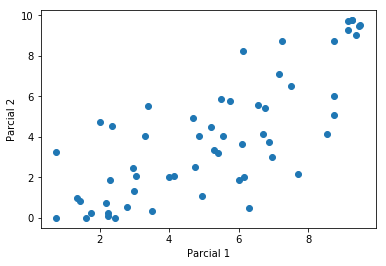

In [7]:
# Por ejemplo, la siguiente gráfica muestra la relación entre las notas del parcial 1 y el 2
import matplotlib.pyplot as plt
x = df.loc[:,'Par1']
y = df.loc[:,'Par2']
plt.plot(x,y,'o')
plt.xlabel('Parcial 1')
plt.ylabel('Parcial 2')
plt.show()

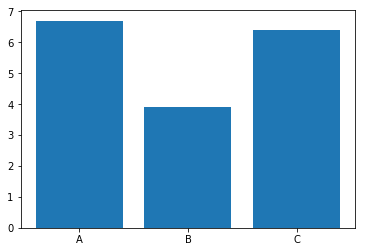

In [5]:
# La siguiente gráfica de barras muestra la nota media de Prácticas en cada grupo

# Creamos un objeto 'notas' de tipo 'Series' cuyos índices son los grupos y cuyos 
# valores son las notas medias de la columna 'Practicas'
notas = df.groupby('Grupo')['Practicas'].mean()


import matplotlib.pyplot as plt
plt.bar(notas.index, notas.values) # Mostrar los índices en el eje x y las notas en el eje y
plt.show()

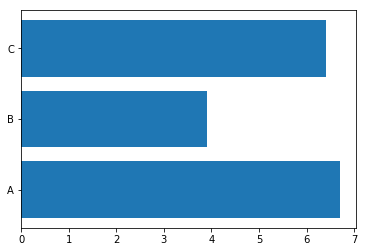

In [7]:
# La misma gráfica, pero en horizontal
plt.barh(notas.index, notas.values)
plt.show()

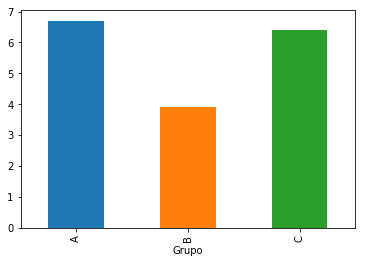

In [3]:
# Lo anterior también se puede hacer sin usar la librería matplotlib, ya que
# los objetos de tipo 'Series' tienen sus propios métodos para mostrar gráficas

notas = df.groupby('Grupo')['Practicas'].mean()
notas.plot.bar()

**Múltiples gráficas en una sola figura**

Para crear varias gráficas en una sola figura debe usarse la función 
`plt.subplot(filas, columnas, índice)` donde:
- `filas` x `columnas` representa el número total de gráficas a dibujar, organizadas en una matriz de esas dimensiones.
- `indice` debe ser un valor entre 1 y `filas` x `columnas` que representa la ubicación de la siguiente gráfica en la matriz, siendo 1 la primera fila y columna, avanzando sucesivamente de izquierda a derecha y de arriba a abajo.

<BarContainer object of 3 artists>

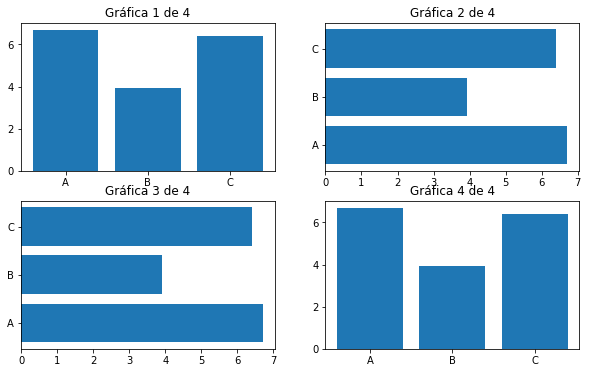

In [12]:
plt.figure(figsize=(10, 6)) # Tamaño total de la figura
plt.subplot(2, 2, 1) # Gráfica 1 de un total de 2x2 gráficas
plt.title('Gráfica 1 de 4')
plt.bar(notas.index, notas.values)
plt.subplot(2, 2, 2) # Gráfica 2 de un total de 2x2 gráficas
plt.title('Gráfica 2 de 4')
plt.barh(notas.index, notas.values)
plt.subplot(2, 2, 3) # Gráfica 3 de un total de 2x2 gráficas
plt.title('Gráfica 3 de 4')
plt.barh(notas.index, notas.values)
plt.subplot(2, 2, 4) # Gráfica 4 de un total de 2x2 gráficas
plt.title('Gráfica 4 de 4')
plt.bar(notas.index, notas.values)

[Volver al índice](#indice)

<a id='ajuste'></a>
## Ajuste por mínimos cuadrados
También puedes ajustar tus datos a cualquier tipo de función, tal y como se explica en el [tutorial de introducción al ajuste de funciones](introduccion_ajuste_curvas.ipynb).

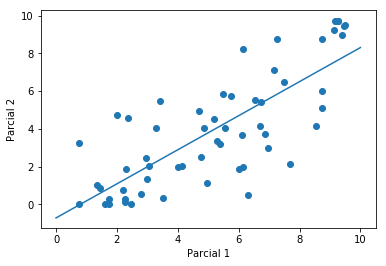

In [7]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np

# Definir una función lineal
def linear(x, a, b): return a * x + b

# Si falta alguna nota, poner 0
df['Par1'].fillna(0, inplace=True)
df['Par2'].fillna(0, inplace=True)

# Obtener las notas de los parciales 1 y 2
x = df.loc[:,'Par1']
y = df.loc[:,'Par2']

# Ajustar la relación entre ambas notas a una recta del tipo Ax+B
(A, B), _ = opt.curve_fit(linear, x, y)

# Obtener una serie de puntos de la recta Ax+B y visualizar
xfit = np.linspace(0,10,100)
yfit = linear(xfit, A, B)
plt.scatter(x, y)
plt.plot(xfit, yfit, '-')
plt.xlabel('Parcial 1')
plt.ylabel('Parcial 2')
plt.show()

[Volver al índice](#indice)